In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.colors import LogNorm

#from matplotlib import rc, rcParams
import copy
import os

from scipy.integrate import odeint
from HTC_utils import *

import networkx as nx
import igraph as ig

from tqdm.auto import tqdm
from numba import jit, prange

In [2]:
rc = {"font.family" : "DejaVu Serif", 
      "mathtext.fontset" : "dejavuserif",
      "xtick.labelsize": 18,
      "ytick.labelsize": 18,
      'axes.labelsize': 26}
plt.rcParams.update(rc)

#plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [3]:
Aij = np.loadtxt('connectome.txt')
W = normalize(Aij)

r1 = 0.1
r2 = 0.1

Tminus = r1 * r2 / (r1 + r2 + r1*r2)
Tplus = r2 / (2*r2 +1)

xplus = Tplus
yplus = Tplus / r2

xminus = Tminus
yminus = Tminus / r2

print(Tminus)
print(Tplus)

0.04761904761904762
0.08333333333333334


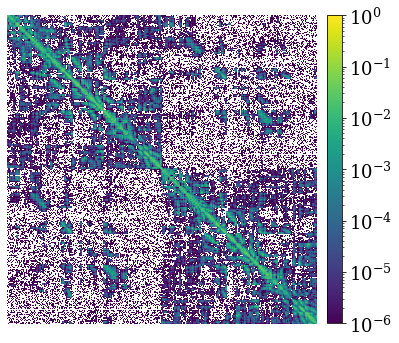

In [4]:
plt.figure(figsize=(6,6))
im = plt.imshow(Aij, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')
plt.show()

# Null model 1
Maslov-Sneppen algorithm: same degree sequence <br>
(*) better than configuration model -> no self-loops or multi-edges

In [107]:
folder = 'randomized/'

for filename in os.listdir(folder):
    if 'npy' in filename:
        if '_1' in filename:
            print(filename)
            Q = np.load(folder+filename)

454050_1.txt.npy


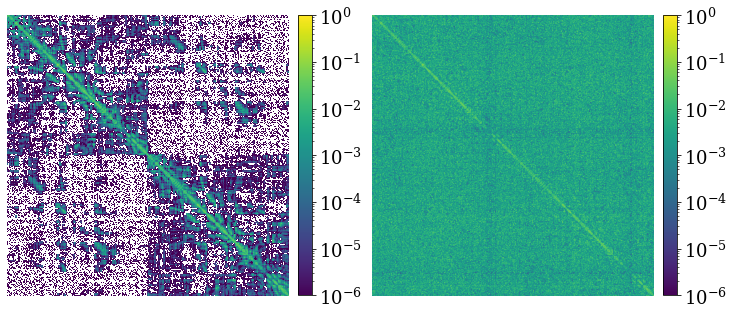

In [108]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
im = plt.imshow(Aij, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')

plt.subplot(1,2,2)
im = plt.imshow(Q, norm=LogNorm(vmin=1e-6, vmax=1))
plt.colorbar(im,fraction=0.046, pad=0.03)
plt.axis('off')

plt.show()

In [114]:
len(Aij.nonzero()[0]) / 1e4

7.9574